# CASA0006 DSSS Personal_Assessment

### A Comparison of Logistic Regression, Decision Tree, Random Forest and Support Vector Machines in Predicting Public's Attitudes to The Basic Income
Word count: 2752 , and this code may take about 350s 

## 1. Introduction and Literature Review

Basic income (BI) was proposed by Phillip van Parijs (1997) as social welfare policy, that is a fixed amount of money for each person regardless of property status or their ability to gain income. Definitions for BI was then developed, but the commonly used one is that a fixed amount of money paid by a government to all citizens (or residents)   aged (for example) sixteen and elder on a monthly basis; and the only requirement for the recipient is ‘an eligible member’ of a government with no other conditions (Mencinger, 2015). While the initial aim of Bi is to guarantee people's basic needs, it has aroused different opinions within Europe. On the one hand, scholars represented by Mencinger (2015) support BI because it is an economically feasible and socially desirable solution in Europe and it could enhance the long-term stability and persistence of European associations. Also, according to the leading supporter of BI, Philippe Van Parijs, the purpose of basic income is to help people who suffered from unemployment and poorly remunerated employment to achieve the "real freedom" (1997) because he believed that BI can guarantee the financial resources, the basic requirement of real freedom.  Furthermore, BI is believed to be able to reduce the vulnerability of the poor and labourers to long-term risk of job displacement by securing their ‘power to say no’ (Jones, 2013).

On the other hand, Coyle and Wildavsky (1987) opposed BI because they believe that the curse of the poor is to give them more money since they may only use the money to meet basic needs and not pursue more wealth. And this has become a ground for opposing basic income policy. Other critics, such as Moffitt (1981) and Kenworthy (2014), worried this policy may lead to low participation in the labour market. Kenworthy (2014) also mentioned that adopting BI may weaken the economy because of low work incentives and decoupling labours from the social environment. Besides that, Calnitsky and Latner (2017) analyzed effects from a basic income experiment that took place in a rural town called Dauphin in the Canadian province of Manitoba. The results showed that 11.3% reduction in labour market participation caused by a modestly sized basic income, 30% of which can be attributed to social interaction effects. Also, the experiment showed that some factors, for example, gender, age, family status, and education level, could affect results. 

Even the past research has had great analysis from sociologists’ perspectives, the public’s views on this policy were neglecting, including social analysis or prediction of the public's attitudes in different cities. Hence, this report aims to find the most suitable method to predict the public attitudes of the Basic Income based on a 2016 European questionnaire survey. Based on the findings mentioned before, those factors, such as gender, age, family status, education level, will be taken into consideration. This public questionnaire also recorded the nationality of interviewees, so nationality will be taken into account as a spatial factor. The data applied for this work will then be introduced firstly, so does the processing and visualization some critical data; the methods employed will then be displayed; it is also expected to present and discuss the results; and finally, limitation and conclusion for this case will be shown.


## 2. Data Cleaning and Presentation 

### 2.1 Presentation of Data

The data employed for this work comes from a BI Survey, which is considered as the first large-scale survey of Europeans' opinions and attitudes on basic income (Baranowski and Jabkowski, 2019). Dalia Research conducted this study in April 2016. According to the survey, there were 9,649 respondents in this study, which were taken across all 28 EU states. Besides that, various factors such as age, gender, region or country, education level and their attitudes are taken into consideration in this survey.

After importing the relevant libraries and packages, part of the data with key information is shown below.

In [1]:
# import elevant libraries and packages at first 
import time
import os
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Default settings in class
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

start_time = time.time()  # record start time


In [2]:
survey_data = pd.read_csv('basic_income_dataset_dalia.csv')  # Read data we need

In [3]:
# to view some first rows
survey_data.head()

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.977591916
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136


In [4]:
# use info() function to view the missing values and dtype of each column
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 15 columns):
country_code                                           9649 non-null object
uuid                                                   9649 non-null object
age                                                    9649 non-null int64
gender                                                 9649 non-null object
rural                                                  9649 non-null object
dem_education_level                                    8986 non-null object
dem_full_time_job                                      9649 non-null object
dem_has_children                                       9649 non-null object
question_bbi_2016wave4_basicincome_awareness           9649 non-null object
question_bbi_2016wave4_basicincome_vote                9649 non-null object
question_bbi_2016wave4_basicincome_effect              9649 non-null object
question_bbi_2016wave4_basicincome_argumentsfor        964

In [5]:
# To inspect the objects (strings), use include=['O']. 'O' means OBJECT type.
survey_data.describe(include=['O']).T

,count,unique,top,freq
country_code,9649,28,DE,1420
uuid,9649,9649,65f27ed0-dc05-0133-df47-0a81e8b09a82,1
gender,9649,2,male,5094
rural,9649,2,urban,6878
dem_education_level,8986,4,medium,3578
dem_full_time_job,9649,2,yes,5702
dem_has_children,9649,2,yes,5049
question_bbi_2016wave4_basicincome_awareness,9649,4,I know something about it,3389
question_bbi_2016wave4_basicincome_vote,9649,5,I would probably vote for it,3272
question_bbi_2016wave4_basicincome_effect,9649,9,A basic income would not affect my work choices,3349


### 2.2 Data Processing

#### 2.2.1 Rename the columns

The original column names in the questionnaire were modified because they contained unnecessary symbols which are not suitable in the analysis. The contents were also checked once more. 

In [6]:
#rename the column
survey_data.rename(columns = {'rural':'City_or_Rural',
                     'dem_education_level':'Education_Level',
                     'dem_full_time_job':'Full_time_job_or_Not',
                     'dem_has_children':'Has_Children',
                     'question_bbi_2016wave4_basicincome_awareness':'Awareness',
                     'question_bbi_2016wave4_basicincome_vote':'Vote',
                     'question_bbi_2016wave4_basicincome_effect':'Effect',
                     'question_bbi_2016wave4_basicincome_argumentsfor':'Reason_for',
                     'question_bbi_2016wave4_basicincome_argumentsagainst':'Reason_against'},inplace=True)

In [7]:
survey_data.shape #check the data shape 

(9649, 15)

In [8]:
survey_data.head() # check the data, and the name of column

,country_code,uuid,age,gender,City_or_Rural,Education_Level,Full_time_job_or_Not,Has_Children,Awareness,Vote,Effect,Reason_for,Reason_against,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.977591916
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136


#### 2.2.2 Dealing with missing data

The next step then is to use`.count()`and `.isna()` to find whether the dataset contains null values. According to the results shown below, the column named as `Education_Level` has many null variables. Hence, `fillna()` method is used to handle missing values. 

In [9]:
survey_data.count()  #  count each column

country_code            9649
uuid                    9649
age                     9649
gender                  9649
City_or_Rural           9649
Education_Level         8986
Full_time_job_or_Not    9649
Has_Children            9649
Awareness               9649
Vote                    9649
Effect                  9649
Reason_for              9649
Reason_against          9649
age_group               9649
weight                  9649
dtype: int64

In [10]:
survey_data.isna().sum()  # find NA

country_code              0
uuid                      0
age                       0
gender                    0
City_or_Rural             0
Education_Level         663
Full_time_job_or_Not      0
Has_Children              0
Awareness                 0
Vote                      0
Effect                    0
Reason_for                0
Reason_against            0
age_group                 0
weight                    0
dtype: int64

To be more specific, `Educational_Level` was generated from one single question: `‘Which of the following best describes your formal education? ’` . There were five choices, namely `‘I do not have a formal education’`, `‘I have some high school or secondary school education’`, `‘I completed high school or obtained an equivalent diploma’`, `‘I have completed a university or equivalent degree’`, and `‘Other/I would rather not answer this question’`. When a participant selects the final choice, which produces a null value, it is possible that this participant has not experienced formal education or received a technical education, which is a similar situation to answer 1. Followed by Baranowski and Jabkowski (2019), who treated null values as 'no' in their research, this report modified these null values generated from the final choice as 'no' to facilitate analysis.

In [11]:
survey_data.Education_Level.unique() # Return unique values of Education_Level

array(['no', 'high', nan, 'medium', 'low'], dtype=object)

In [12]:
survey_data.Education_Level.value_counts() #count the Education_Level

medium    3578
high      3270
low       1815
no         323
Name: Education_Level, dtype: int64

In [13]:
survey_data.fillna('no', inplace=True)  # Fill NA with no

In [14]:
survey_data.Education_Level.unique()  # Check unique values of Education_Level

array(['no', 'high', 'medium', 'low'], dtype=object)

In [15]:
survey_data.isna().sum()

country_code            0
uuid                    0
age                     0
gender                  0
City_or_Rural           0
Education_Level         0
Full_time_job_or_Not    0
Has_Children            0
Awareness               0
Vote                    0
Effect                  0
Reason_for              0
Reason_against          0
age_group               0
weight                  0
dtype: int64

### 2.2.3 Data transfomation

With confirmed zero missing data value in the original dataset, the data cleaning process smoothly ended. For the next step, the text columns in the dataset were converted to an identifiable form. For example, the Vote results were transferred to `‘for, against or no action’` from their original answers. Furthermore, answers for reasons to support or not, awareness and effect were simplified by extracting keywords from original answers.

#### 2.2.3.1 Transfer Vote Results

In [16]:
# Transfer Vote Results to positive and negative results
def rearrange_vote(data):
    switcher={
        'I would not vote':'no_action',
        'I would probably vote for it':'for',
        'I would vote for it':'for',
        'I would vote against it':'against',
        'I would probably vote against it':'against',
    }
    return switcher.get(data,"NaN")


survey_data['Vote'] = survey_data['Vote'].apply(rearrange_vote)

In [17]:
survey_data.Vote.unique()  # Check unique values of Vote Results

array(['no_action', 'for', 'against'], dtype=object)

#### 2.2.3.2 Transfer Awareness Results

In [18]:
survey_data.Awareness.unique()   # Return unique values of Awareness Results

array(['I know something about it', 'I understand it fully',
       'I have heard just a little about it', 'I have never heard of it'],
      dtype=object)

In [19]:
# Transfer Awareness Results 

def rearrange_awareness(data):
    switcher={
        'I understand it fully':'fully',
        'I know something about it':'something',
        'I have heard just a little about it':'a_little',
        'I have never heard of it':'never_heard',
    }
    return switcher.get(data,"NaN")


survey_data['Awareness'] = survey_data['Awareness'].apply(rearrange_awareness)

In [20]:
survey_data.Awareness.unique()  # Check unique values of Awareness Results

array(['something', 'fully', 'a_little', 'never_heard'], dtype=object)

#### 2.2.3.3 Transfer Effect Results

In [21]:
survey_data.Effect.unique()   # Return unique values of Effect

array(['None of the above',
       'A basic income would not affect my work choices',
       '‰Û_ gain additional skills', '‰Û_ work less',
       '‰Û_ work as a freelancer', '‰Û_ do more volunteering work',
       '‰Û_ stop working', '‰Û_ spend more time with my family',
       '‰Û_ look for a different job'], dtype=object)

In [22]:
# Transfer Effect Results 

def rearrange_effect(data):
    switcher={
        '‰Û_ gain additional skills':'gain_additional_skills',
        '‰Û_ work less':'work_less',
        '‰Û_ work as a freelancer':'freelancer',
        '‰Û_ do more volunteering work':'more_volunteering_work',
        '‰Û_ stop working':'stop_working',
        '‰Û_ spend more time with my family':'more_family_time',
        '‰Û_ look for a different job':'change_a_job',
        'A basic income would not affect my work choices':'no_effect',

    }
    return switcher.get(data,"none_of_the_above")


survey_data['Effect'] = survey_data['Effect'].apply(rearrange_effect)

In [23]:
survey_data.Effect.unique()  # Check unique values of Effect Results

array(['none_of_the_above', 'no_effect', 'gain_additional_skills',
       'work_less', 'freelancer', 'more_volunteering_work',
       'stop_working', 'more_family_time', 'change_a_job'], dtype=object)

#### 2.2.3.4 Transfer Reason Results###

The text columns for reasons are different since this is a multiple-choice question, the answers are too complex to apply. Hence, this work converts reasons for Boolean values (Ture or False) by searching for keywords.

In [24]:
# Transfer Reaon_for 
survey_data['Reduce_anxiety'] = survey_data['Reason_for'].str.contains('anxiety')
survey_data['Create_more_equality'] = survey_data['Reason_for'].str.contains('equality')
survey_data['Encourages_fin_independence&self-respon'] = survey_data['Reason_for'].str.contains('financial independence')
survey_data['Increases_solidarity'] = survey_data['Reason_for'].str.contains('solidarity')
survey_data['Reduces_bureaucracy'] = survey_data['Reason_for'].str.contains('bureaucracy')
survey_data['Increases_appreciation'] = survey_data['Reason_for'].str.contains('appreciation')
survey_data['Just_support'] = survey_data['Reason_for'].str.contains('None')


In [25]:
# Transfer Reaon_Against 
survey_data['Impossible_to_finance'] = survey_data['Reason_against'].str.contains('impossible')
survey_data['Stop_working'] = survey_data['Reason_for'].str.contains('equality')
survey_data['Foreigners'] = survey_data['Reason_for'].str.contains('Foreigners')
survey_data['Against_principle'] = survey_data['Reason_for'].str.contains('principle')
survey_data['Only_in_need'] = survey_data['Reason_for'].str.contains('need')
survey_data['Increases_dependence'] = survey_data['Reason_for'].str.contains('dependence')
survey_data['Just_against'] = survey_data['Reason_for'].str.contains('None')


In [26]:
survey_data.head()  #Check the data

,country_code,uuid,age,gender,City_or_Rural,Education_Level,Full_time_job_or_Not,Has_Children,Awareness,Vote,...,Reduces_bureaucracy,Increases_appreciation,Just_support,Impossible_to_finance,Stop_working,Foreigners,Against_principle,Only_in_need,Increases_dependence,Just_against
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,something,no_action,...,False,False,True,False,False,False,False,False,False,True
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,fully,for,...,False,True,False,False,False,False,False,True,True,False
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,no,no,no,a_little,no_action,...,False,False,False,False,True,False,False,False,False,False
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,a_little,for,...,False,False,False,False,False,False,False,True,False,False
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,a_little,for,...,False,False,False,True,False,False,False,True,False,False


### 2.3 Data visualization

First of all, this study is interested in the public voting results.

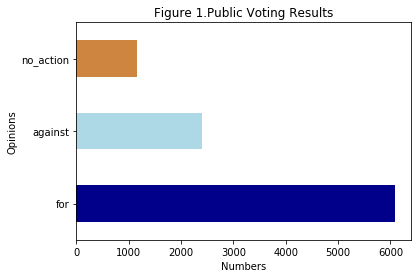

In [27]:
import random
n = survey_data['Vote'].unique().__len__()+1

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

survey_data['Vote'].value_counts().plot.barh(color = c)
plt.title('Figure 1.Public Voting Results')
plt.xlabel('Numbers')
plt.ylabel('Opinions')
plt.show()

According to figure 1, more than 6,000 respondents in the EU support the basic income policy, far exceeding the number of opposed and unsentimental.

Then, this research continues to study the relationship between the voting results and different factors, such as country, gender, etc. As an important spatial factor, the relationship between voting results and countries is displayed in the form of a histogram.

In [28]:
survey_data.country_code.value_counts()

DE    1420
FR    1248
GB    1199
IT    1138
ES    1005
PL     860
RO     332
NL     331
GR     225
HU     206
PT     202
CZ     189
BE     179
SE     175
BG     141
AT     133
DK     119
FI     113
SK      93
IE      90
HR      87
LT      50
LV      36
SI      28
EE      18
CY      13
LU      11
MT       8
Name: country_code, dtype: int64

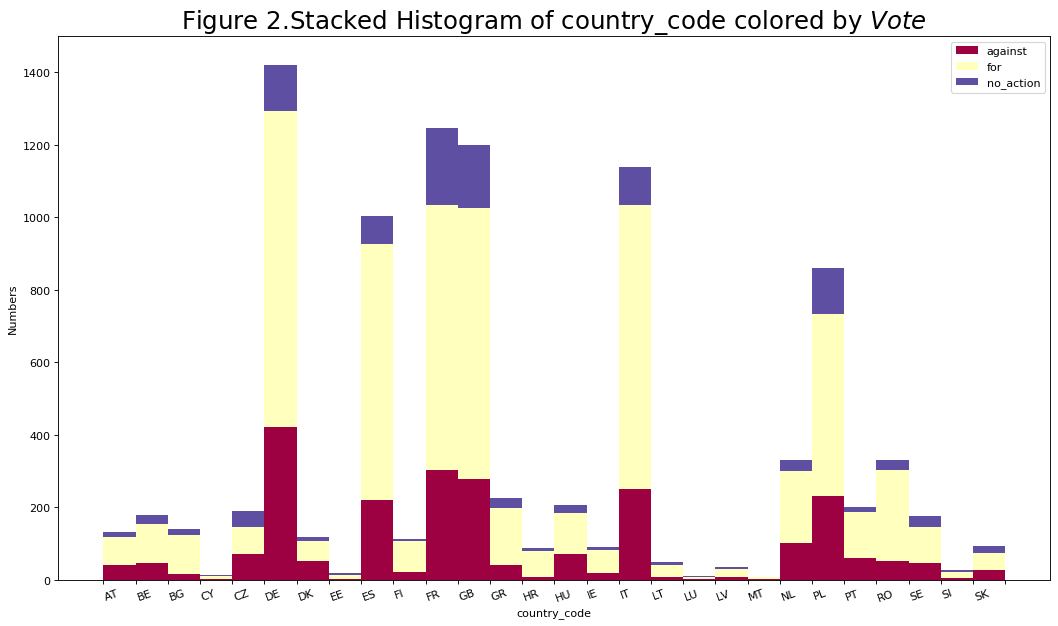

In [29]:
#Code comes from :
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# Prepare data
x_var = 'country_code'
groupby_var = 'Vote'
survey_data_agg = survey_data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [survey_data[x_var].values.tolist() for i, survey_data in survey_data_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, survey_data[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(survey_data[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Figure 2.Stacked Histogram of country_code colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Numbers")
plt.ylim(0, 1500)
plt.xticks(ticks=bins, labels=np.unique(survey_data[x_var]).tolist(), rotation=20, horizontalalignment='left')
plt.show()

According to figure 2, in almost all countries, the number of people who support the implementation of basic income was greater than the opponents. However, the numbers of participants from different countries vary significantly. As shown in the figure, most participants were from Denmark, France, and Great Britain, while only a few of them came from Luxembourg, Estonia, and Malta. From Figure 3 to 6 below, it can be found that there is not much difference in voting in factors. For example, men and women, people with a full-time job or not are all showing similar voting patterns. One significant difference lies in education level, namely people who have not received education obviously show no attitude towards basic income.

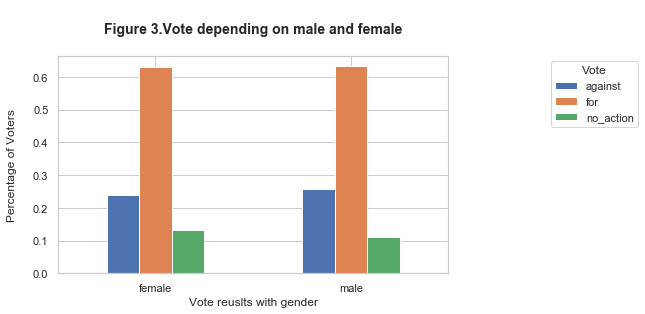

In [30]:
sns.set(style="whitegrid")
Gender_data = survey_data.groupby('gender')['Vote'].value_counts(normalize=True).unstack()
Gender_data.plot(kind='bar', figsize=(7,4))
plt.xlabel("Vote reuslts with gender")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nFigure 3.Vote depending on male and female\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 1.0), title='Vote');

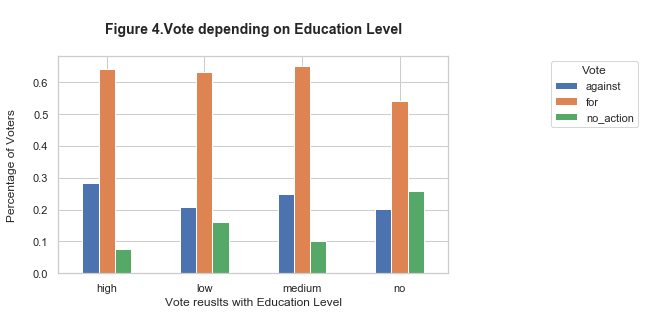

In [31]:
Educational_data = survey_data.groupby('Education_Level')['Vote'].value_counts(normalize=True).unstack()
Educational_data.plot(kind='bar', figsize=(7,4))
plt.xlabel("Vote reuslts with Education Level")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nFigure 4.Vote depending on Education Level\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 1.0), title='Vote');

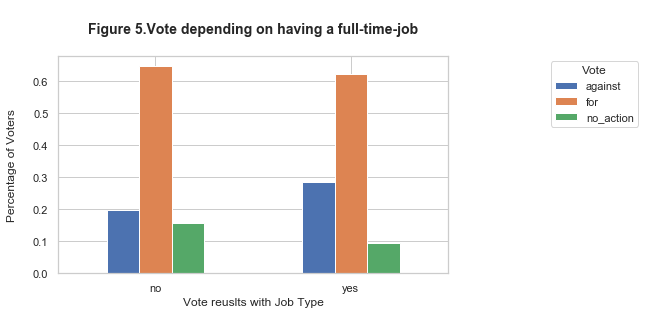

In [32]:
Job_Type_data = survey_data.groupby('Full_time_job_or_Not')['Vote'].value_counts(normalize=True).unstack()
Job_Type_data.plot(kind='bar', figsize=(7,4))
plt.xlabel("Vote reuslts with Job Type")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nFigure 5.Vote depending on having a full-time-job\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 1.0), title='Vote');

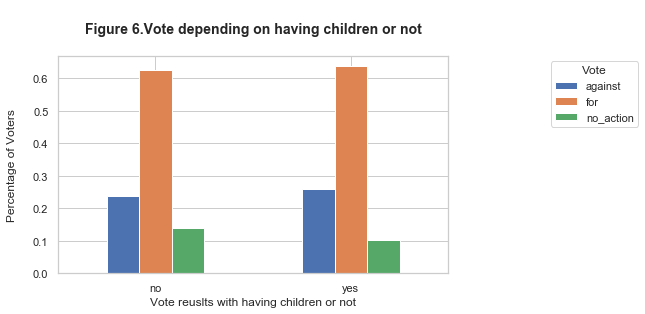

In [33]:
family_data = survey_data.groupby('Has_Children')['Vote'].value_counts(normalize=True).unstack()
family_data.plot(kind='bar', figsize=(7,4))
plt.xlabel("Vote reuslts with having children or not")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nFigure 6.Vote depending on having children or not\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.5, 1.0), title='Vote');

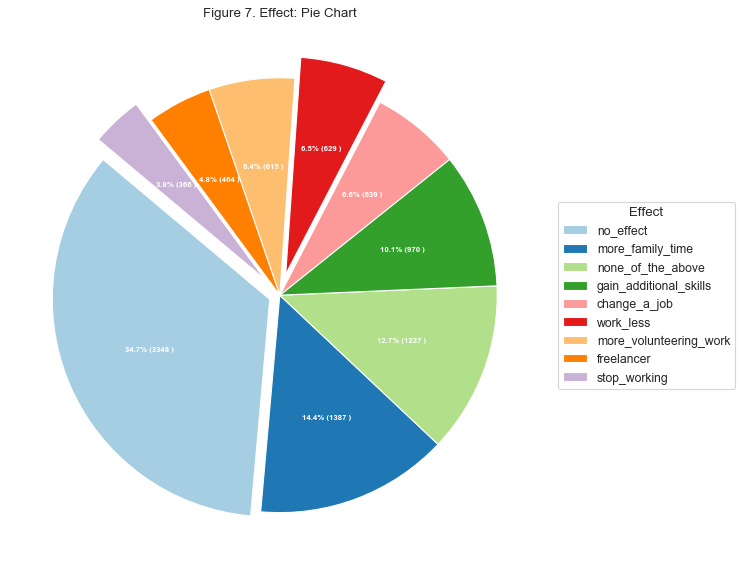

In [34]:
#Code comes from :
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw=dict(aspect="equal"), dpi= 80)

data = survey_data['Effect'].value_counts()
categories = ['no_effect','more_family_time', 'none_of_the_above', 
              'gain_additional_skills','change_a_job',
              'work_less', 'more_volunteering_work','freelancer','stop_working']
explode = [0.05,0,0,0,0,0.1,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=plt.cm.Paired.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Effect", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=7, weight=800)
ax.set_title("Figure 7. Effect: Pie Chart")
plt.show()

Besides that, Figure 7 shows people’s attitude on the impact of BI on work. 33% of respondents believed BI may have no impact, while 10% of people believe that they can retire and do not have to work hard with BI, and this may have a negative influence on economic activities. Meanwhile, 30% of respondents BI and reduced work time mean that they can spend more time on their families or do more volunteers, which is positive to social stability.

Then this report analyses the age group of interviewees. Histograms and normal distributions are used in this part.

In [35]:
# mean value of age
age = survey_data['age']
mean = age.mean()
std = age.std()
mean

37.71271634366256

In [36]:
std # # Std value of age


12.270630450495897

In [37]:
#normfun: Normal distribution，mu: mean，sigma: std，
#pdf:Probability density function，np.exp():Probability density function formula
def normfun(x,mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


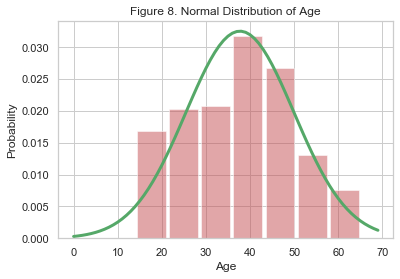

In [38]:
#The range of x is 0-70, in units of 1, 
#x needs to be adjusted according to the range
x = np.arange(0, 70,1)

# Probability density corresponding to x 
y = normfun(x, mean, std)

# Parameter, color, line width
plt.plot(x,y, color='g',linewidth = 3)

#Data, color, group width, display frequency
plt.hist(age, bins =7, color = 'r',alpha=0.5,rwidth= 0.9, normed=True)

plt.title('Figure 8. Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

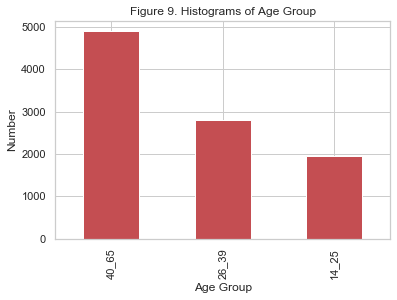

In [39]:
survey_data['age_group'].value_counts().plot.bar(color = 'r')
plt.title('Figure 9. Histograms of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.show()

Figure 8 reveals that the majority of respondents were at their 40s. Figure 9 also proves that there were more than 5000 people in the 40-65 group. However, the original questionnaire for age was not scientific. To solve this problem, age groups were divided according to the distribution of IQR in this study.

In [40]:
survey_data['age'].describe().T

count                                 9,649.0000
mean                                     37.7127
std                                      12.2706
min                                      14.0000
25%                                      28.0000
50%                                      40.0000
75%                                      46.0000
max                                      65.0000
Name: age, dtype: float64

In [41]:
# Remove the orginal age group
survey_data.drop(['age_group'], axis=1, inplace=True)

In [42]:
# define new age group
def age_groups(row):
    if row <= 28: return('14_28')
    elif row <= 40: return('28_40')
    elif row <= 46: return('40_46')
    else: return('above_46')
    
survey_data['age_group'] = survey_data['age'].apply(age_groups)
survey_data.drop(['age'], axis=1, inplace=True)

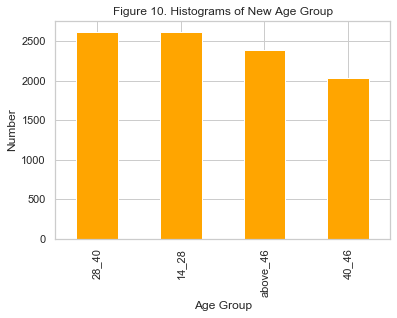

In [43]:
# Plot new age group

survey_data['age_group'].value_counts().plot.bar(color='orange')
plt.title('Figure 10. Histograms of New Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number')
plt.show()

The number of people in each age group is more balanced than before.

# 3.Methodlogy

Four Classification Models are used in this work for attitudes prediction. Besides that, `GridSearchCV` has been used because it is able to determine some parameters to enhance the fitting ability of the model. 

## 3.1 Logistic Regression

Public attitude, the variable, is regarded as a binary variable commonly, such as support or not. For the prediction of such variable, Logistic Regression (LR) is a widely applied statistical technique of choice when developing new models and testing existing instruments (Hosmer et al., 2013). LR is able to estimate the probability of a certain event occurring by applying maximum likelihood estimation after transforming the dependent into a logit variable (Liu et al., 2011). Therefore, LR is used to classify individuals in the target categories based on the logistic function.

## 3.2 Decision Tree

The Decision Tree model (DT), developed by Breiman et al. (1984), is a questions-decision tree model. It asks several questions and makes the final decision based on the answers from previous questions. While DT has different series, such as Classification and Regression Tree (CART) (Breiman et al. 1984), Chi-squared and Interactive Decision (CHAID), and Decision Tree Forests (also Random Forest) (Liu et al, 2011), CART model is chosen in this project because different segmentation points for each attribute can be taken into account. While CART can only generate binary trees (Alawad, 2018), it CART still has its strength as it could look for the best (attribute, value) pair as a splitting point, rather than the best properties only. As Bakhshayeshian and Khalili (2015) said, another strength of CART is that it uses the Gini index as a splitting criterion, so CART is chosen for the ability to handle missing values and accepting both categorical and continues features.

## 3.3 Random Forest Classifier

Random Forest Classifier, a machine‐learning algorithm based on tree ensembles by Breiman (2001), have been proven to be very popular and powerful techniques in the pattern recognition for high-dimensional classification and skewed problems. Thus, it is used in this project. 

## 3.4 Support Vector Machines

The last method used is the Support vector machine, which is also a statistical and machine learning technology with the main goal of prediction. Moreover, SVM is a relatively new type of classifier, with the key advantage of constructing classification models very quickly, especially for megavariate data (Harrington, 2015).

# 4. Results and Discussion

## 4.1 Data Transformation

The process of transforming data includes the following steps:
1.	Split the survey_data into two datasets corresponding to predictors `feature_data` and the response variable `y`;
2.	Transform strings in the response variable into numeric forms, which is applicable in the analysis process;
3.	Transform strings in the predictors into binary values using one-hot encoding;
4.	Split the datasets into the training set and the testing set.

At first, useless columns are removed. Since this study aims to figure out whether the respondent supports it or not, the option of `no_action` has also been removed. 

In [44]:
# Drop the column we don't need 
survey_data.drop(['uuid', 'weight','Reason_for','Reason_against'], axis=1, inplace=True)

In [45]:
survey_data.shape

(9649, 24)

In [46]:
# remove those attitudes no positve or negative
survey_data = survey_data.query("Vote != 'no_action'")

In [47]:
survey_data.shape

(8490, 24)

In [48]:
# feature_data and y dataset
feature_data = survey_data.drop('Vote', axis=1)
y = survey_data['Vote']

In [49]:
# inspect the variable of Vote
survey_data['Vote'].value_counts()

for        6091
against    2399
Name: Vote, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder() # creates the LabelEncoder object
le.fit(['for','against']) # this gives you control on the order. Here, 'against' and 'for' would be encoded as 0 and 1 respectively.
labels_fea = le.transform(survey_data['Vote']) # runs LabelEncoder on the Vote column

In [52]:
# again, inspect the result. Note that labels_fea is of the type 'ndarray' rahter than pd.Series or pd.DataFrame
pd.Series(labels_fea).value_counts()

1    6091
0    2399
dtype: int64

In [53]:
from sklearn.feature_extraction import DictVectorizer

In [54]:
#create the dictionaries, and  check the first entry.
data_dict = feature_data.to_dict('record')
print(data_dict[1])

{'country_code': 'AT', 'gender': 'male', 'City_or_Rural': 'rural', 'Education_Level': 'high', 'Full_time_job_or_Not': 'yes', 'Has_Children': 'yes', 'Awareness': 'a_little', 'Effect': 'work_less', 'Reduce_anxiety': True, 'Create_more_equality': False, 'Encourages_fin_independence&self-respon': False, 'Increases_solidarity': False, 'Reduces_bureaucracy': False, 'Increases_appreciation': False, 'Just_support': False, 'Impossible_to_finance': False, 'Stop_working': False, 'Foreigners': False, 'Against_principle': False, 'Only_in_need': True, 'Increases_dependence': False, 'Just_against': False, 'age_group': '40_46'}


In [55]:
vec = DictVectorizer()  # create the DictVectorizer object
data_mat = vec.fit_transform(data_dict)  # execute process on the record dictionaries

In [56]:
data_mat

<8490x71 sparse matrix of type '<class 'numpy.float64'>'
	with 195270 stored elements in Compressed Sparse Row format>

In [57]:
print(data_mat.shape)
print(type(data_mat))
data_mat

(8490, 71)
<class 'scipy.sparse.csr.csr_matrix'>


<8490x71 sparse matrix of type '<class 'numpy.float64'>'
	with 195270 stored elements in Compressed Sparse Row format>

In [58]:
# convert the matrix into an array
data_array = data_mat.toarray() 
print(data_array.shape)
print(type(data_array))
data_array

(8490, 71)
<class 'numpy.ndarray'>


array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])

The final stage in data transformation involves splitting the prepared dataset into the subset training and the testing subset. The training data is then used to create the classifier. The testing data is then applied when testing the accuracy of the classification.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_d, test_d, train_lab, test_lab = train_test_split(data_array, labels_fea) #split data to train and test

In [61]:
print(train_d.shape)
print(test_d.shape)

(6367, 71)
(2123, 71)


## 4.2 Results with Imbalanced Data

### 4.2.1 Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Set parameter
params_test1 = {'max_iter':[10e2,10e3,10e4,10e5,10e6,10e7]}
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid=params_test1, cv=10)
clf.fit(data_array,labels_fea)

print('Best parameters:')
print(clf.best_params_)

Best parameters:
{'max_iter': 1000.0}


In [63]:
#train model
# max_iter is 10^3 as shown
clf_logit_reg = LogisticRegression(max_iter=10e3).fit(train_d, train_lab)

In [64]:
clf_logit_reg.score(test_d, test_lab)

0.7870937352802638

In [65]:
# test the model using the testing data 

from sklearn import metrics

test_pred_logit_reg = clf_logit_reg.predict(test_d)
print ('Table 1.Classification Report Logistic Regression: \n',metrics.classification_report(test_lab, test_pred_logit_reg))


Table 1.Classification Report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.70      0.47      0.57       622
           1       0.81      0.92      0.86      1501

    accuracy                           0.79      2123
   macro avg       0.76      0.70      0.71      2123
weighted avg       0.78      0.79      0.77      2123



According to the score of Logistic Regression, the classifier seems to do pretty well, which means this method is able to predict the vote results with an expected accuracy of 80%. However, table 1 shows that the classifier performs poorly in identifying individuals who are voting against basic income with a low recall score of 0.49 and the f1-score of 0.57. This means that the classifier could identify no more than 50 of them if 100 EU respondents are given.

### 4.2.2 Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

# Set parameter
params_test2 = {'max_depth':np.arange(10, 20),
          'min_samples_leaf':np.arange(1, 8),
          'min_samples_split':np.arange(2, 8)
         }
rfc = DecisionTreeClassifier()
clf = GridSearchCV(rfc, param_grid=params_test2, cv=10)
clf.fit(data_array,labels_fea)

print('Best parameters:')
print(clf.best_params_)

Best parameters:
{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [67]:
#train model
clf_decision_tree = DecisionTreeClassifier(max_depth=10,min_samples_leaf=7,min_samples_split=4)  # creates the kNN classifier, setting it to check the 60 neighbouring points
clf_decision_tree.fit(train_d, train_lab)
test_pred_decision_tree = clf_decision_tree.predict(test_d)

In [68]:
# test the model using the testing data 
print ('Table 2.Classification Report Decision Tree: \n',metrics.classification_report(test_lab, test_pred_decision_tree))

Table 2.Classification Report Decision Tree: 
               precision    recall  f1-score   support

           0       0.65      0.44      0.52       622
           1       0.79      0.90      0.84      1501

    accuracy                           0.77      2123
   macro avg       0.72      0.67      0.68      2123
weighted avg       0.75      0.77      0.75      2123



The next classifier is The Classification and Regression Trees (CART) algorithm. According to table 2, the score of accuracy is 0.78, which means this classifier could predict vote results with an accuracy of 78%. Same as the Logistic Regression, this classifier identifies supporters better than opponents, because the f1-score of 'for' is 0.85, which is larger than the score of 'against'(0.54). Based on low recall score (0.43) of against, CART algorithm does not still performing well since it may miss part of opponents.

### 4.2.3 Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
from sklearn.model_selection import GridSearchCV

param_test3 = {"n_estimators":[100,110,120,130,140,150,160,170,180,190,200],
              }
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test3,cv=5,n_jobs=1)
gsearch1.fit(data_array, labels_fea)

print('Best parameters:')
print(gsearch1.best_params_)

Best parameters:
{'n_estimators': 180}


In [71]:
#train model
clf_random_forest  = RandomForestClassifier(n_estimators=150)
clf_random_forest = clf_random_forest.fit(train_d, train_lab)
test_pred_random_forest = clf_random_forest.predict(test_d)

In [72]:
# test the model using the testing data 
print ('Table 3.Classification Report Random Forest : \n',metrics.classification_report(test_lab, test_pred_random_forest))

Table 3.Classification Report Random Forest : 
               precision    recall  f1-score   support

           0       0.73      0.46      0.56       622
           1       0.81      0.93      0.86      1501

    accuracy                           0.79      2123
   macro avg       0.77      0.69      0.71      2123
weighted avg       0.78      0.79      0.78      2123



According to the result of GridSearchCV, the dataset has been trained with 'n_estimators' of 150. Although Khoshgoftaar mentioned in 2007 the random forest method has been shown to perform well with imbalanced data when compared to other machine learning classifiers. Based on table 3, this method performs well in the prediction of supporters, but the prediction of opponents is still not ideal because the recall score (0.46) and f1-score (0.56) are not good enough. 

### 4.2.4 Support Vector Machines

In [73]:
from sklearn.svm import SVC
from sklearn import svm

In [74]:
# Set parameter
params_test4 = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
         }
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid=params_test4)
clf.fit(data_array,labels_fea)

print('Best parameters:')
print(clf.best_params_)

Best parameters:
{'C': 0.1}


In [75]:
#train model
clf_svc = svm.SVC(C = 0.1)
clf_svc = clf_svc.fit(train_d, train_lab)
test_pred_svc = clf_svc.predict(test_d)

In [76]:
# test the model using the testing data 
print ('Table 4.Classification Report Support Vector Machines : \n',metrics.classification_report(test_lab, test_pred_svc))

Table 4.Classification Report Support Vector Machines : 
               precision    recall  f1-score   support

           0       0.71      0.43      0.53       622
           1       0.80      0.93      0.86      1501

    accuracy                           0.78      2123
   macro avg       0.75      0.68      0.69      2123
weighted avg       0.77      0.78      0.76      2123



The result of Support Vector Machines shows similar results as the previous three methods, all of which have high accuracy in the supporter category, but lack in the prediction of the opponents with a recall score 0.42.

### 4.2.5 Comparison of Models 

In [77]:
print('------------------Table 5.Model Compare-------------------\n')
print('Logistic Regression: \n', metrics.classification_report(test_lab, test_pred_logit_reg))
print('------------------------------------------------------')
print('Decision Tree: \n', metrics.classification_report(test_lab, test_pred_decision_tree))
print('------------------------------------------------------')
print('Random Forest: \n', metrics.classification_report(test_lab, test_pred_random_forest))
print('------------------------------------------------------')
print('SVM: \n', metrics.classification_report(test_lab, test_pred_svc))

------------------Table 5.Model Compare-------------------

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.70      0.47      0.57       622
           1       0.81      0.92      0.86      1501

    accuracy                           0.79      2123
   macro avg       0.76      0.70      0.71      2123
weighted avg       0.78      0.79      0.77      2123

------------------------------------------------------
Decision Tree: 
               precision    recall  f1-score   support

           0       0.65      0.44      0.52       622
           1       0.79      0.90      0.84      1501

    accuracy                           0.77      2123
   macro avg       0.72      0.67      0.68      2123
weighted avg       0.75      0.77      0.75      2123

------------------------------------------------------
Random Forest: 
               precision    recall  f1-score   support

           0       0.73      0.46      0.56       622
          

According to table 5, all of four models have done well, since the f1 score between 0.78 to 0.80. However, it can be found that the 'for' votes are well classified but the 'against' votes are not. The reason is that the number of the 'against' was 2399, which was far less than supporters, which is called imbalanced data. Based on results, the imbalance of the data, such as the numbers of supporters and opponents differ too much, has affected the experimental results. Alejo et al. (2015) said that the imbalanced problem occurs in a classification problem, namely more samples of some classes than others. The simplest method to solve this problem is increasing the size of the minority class by random over-sampling (Haibo and Garcia, 2009). According to previous research, some over-sampling methods were proposed to deal with the imbalance problem. For example, Chawla et al. (2011) proposed the synthetic minority over-sampling technique (SMOTE), which can generate a new synthetic minority sample by interpolating between several prior positive samples that are close to each other. Besides that, Adaptive synthetic sampling (ADASYN) also uses a system to adaptively create a different number of data based on the synthetic method of data distribution (Haibo,2008). Moreover, García et al. (2008) stated that this method not only generates data but also considers the proximity and spatial distribution of the instances. Hence, this study uses ADASYN algorithm to balance data.

## 4.3 Classification with Balanced Data 


In [78]:
from imblearn.over_sampling import ADASYN 

In [79]:
survey_data['Vote'].value_counts()

for        6091
against    2399
Name: Vote, dtype: int64

In [80]:
# Over-sample data based on train data
train_resampled, test_resampled = ADASYN().fit_sample(train_d, train_lab) 


In [81]:
print(pd.Series(test_resampled).value_counts()) 

0    4616
1    4590
dtype: int64


In [82]:
# split data to train and test
train_d_res, test_d_res, train_lab_res, test_lab_res = train_test_split(train_resampled, test_resampled)


Then this work uses the four methods to train the data again with the previous parameters.

In [83]:
# Logistic Regression
clf_logit_reg_res = LogisticRegression(max_iter=10e3).fit(train_d_res, train_lab_res)
test_pred_logit_reg_res = clf_logit_reg_res.predict(test_d_res)


In [84]:
# Decision Tree
clf_decision_tree_res = DecisionTreeClassifier(max_depth=10,min_samples_leaf=7,min_samples_split=4)  # creates the kNN classifier, setting it to check the 60 neighbouring points
clf_decision_tree_res.fit(train_d_res, train_lab_res)
test_pred_decision_tree_res = clf_decision_tree_res.predict(test_d_res)


In [85]:
# Random Forest
clf_random_forest_res  = RandomForestClassifier(n_estimators=150)
clf_random_forest_res = clf_random_forest_res.fit(train_d_res, train_lab_res)
test_pred_random_forest_res = clf_random_forest_res.predict(test_d_res)

In [86]:
# SVM
clf_svc_res = svm.SVC(C=0.1)
clf_svc_res = clf_svc_res.fit(train_d_res, train_lab_res)
test_pred_svc_res = clf_svc_res.predict(test_d_res)


In [87]:
#Show all results
print('------------------Table 6.Model Compare-------------------\n')
print('Logistic Regression: \n', 
      metrics.classification_report(test_lab_res, test_pred_logit_reg_res))
print('------------------------------------------------------')
print('Decision Tree: \n', 
      metrics.classification_report(test_lab_res, test_pred_decision_tree_res))
print('------------------------------------------------------')
print('Random Forest: \n', 
      metrics.classification_report(test_lab_res, test_pred_random_forest_res))
print('------------------------------------------------------')
print('SVM: \n', 
      metrics.classification_report(test_lab_res, test_pred_svc_res))


------------------Table 6.Model Compare-------------------

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1173
           1       0.69      0.70      0.69      1129

    accuracy                           0.70      2302
   macro avg       0.70      0.70      0.70      2302
weighted avg       0.70      0.70      0.70      2302

------------------------------------------------------
Decision Tree: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      1173
           1       0.72      0.78      0.75      1129

    accuracy                           0.74      2302
   macro avg       0.74      0.74      0.74      2302
weighted avg       0.75      0.74      0.74      2302

------------------------------------------------------
Random Forest: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1173
          

According to table 6, balanced data improved the accuracy of the prediction. The value of recall for people who voted against increased from 0.4 to 0.8 and the f1-score also improved. However, not all models get good results. Logistic Regression classifier's accuracy is less than data before, and the accuracy of the decision tree has not improved.

When training unbalanced data, the four classifiers perform well, with an accuracy between 0.78 and 0.8. Although there are some problems with the prediction of opponents because of the lower recall score. However, when dealing with balanced data, random forest classifier has a better performance than others, and logistic regression does not continue its performance. In this case, both types of predictions are well done.

# 5.Limitation

This study still contains some limitations. The first thing is that the dataset contains too many factors, including more than ten reasons and seven effects. Part of them is irrelevant with the predict values, which may lead to over-fitting.  And it may lead to low robustness or repeatability when the classification model is applied to independent validation data (Nansen et al., 2013). Hence, Principal components analysis (PCA) or Lasso method should be used before starting the process of training data to avoid irrelevant data.

On the other hand, the questionnaire survey only collected nationally of all interviewees, which may lead to inaccurate prediction. It is general to only consider the nationally since the situation of cities or regions interviewees lived is also an essential factor should be taken into consideration. For example, people who lived in a rich region in the UK may not care about the Basic Income, but someone in a poor village is willing to support this policy. In the future, respondents' specific living area information can be collected to improve prediction accuracy.


# 6.Conclusion

This report uses four classification algorithms (Logistic Regression, Decision Tree, Random Forest and Support Vector Machines) based on the 2016 European questionnaire survey to predict whether Europeans accepts the concept of basic income. The dataset shows that in 2016, more than 60% of people in the EU supported the Basic Income. In the analysis, this report also finds that the classification with imbalanced data has a high accuracy for the 'for' result, but it does not perform well on the prediction of the 'against' result. Hence, Adaptive synthetic sampling (ADASYN), a method of over-sampling, is used to balance the data. After that, the accuracy of predicting 'against' result increased. Moreover, based on the results from two classifications, Logistic Regression, Random Forest and Support Vector Machines have similar performances when processing imbalanced data. For the balanced data, random Forest shows a  significant advantage in classification than the other three algorithms, and Logistic Regression performs not well to class the data. Hence, to predict people's attitudes, Random Forest classifiers with ADASYN algorithm is recommended. In the future, this method also could be applied to other social questionnaire predictions, which is useful for the local government to formulate policies.

# 7.Reference List

Alawad, W. et al., 2018. Developing Classification Decision Tree Models to Detect Ddos Attacks Using Computationally Efficient Validation and Hyperparameters Tuning Methods, pp.ProQuest Dissertations and Theses.

Alejo, R., García, V. & Pacheco-Sánchez, J., 2015. An Efficient Over-sampling Approach Based on Mean Square Error Back-propagation for Dealing with the Multi-class Imbalance Problem. Neural Processing Letters, 42(3), pp.603–617.

Bakhshayeshian, Z. & Khalili, M., 2015. An suggested method to university courses presentation based on cart algorithm to pun universities. 2015 2nd International Conference on Knowledge-Based Engineering and Innovation (KBEI), pp.1170–1173.

Baranowski, M. & Jabkowski, P., 2019. Basic Income Attitudes and Welfare Regimes: a Comparative Case Study Based on The Survey Results From Selected European Countries. Studia Socjologiczne, 233(2), pp.37–60.

Breiman, L., 1984. Classification and regression trees / Leo Breiman ... [et al.], Belmont, Calif.: Wadsworth International Group.

Calnitsky, D. & Latner, J.P., 2017. Basic Income in a Small Town: Understanding the Elusive Effects on Work. Social Problems, 64(3), pp.373–397.

Chawla, N. et al., 2011. SMOTE: Synthetic Minority Over-sampling Technique. arXiv.org, 16, pp.321–357.

Coyle, D. & Wildavsky, A., 1987. Requisites of Radical Reform: Income Maintenance Versus Tax Preferences. Journal of Policy Analysis and Management (1986-1998), 7(1), pp.1–16.

de Boves Harrington, P., 2015. Support Vector Machine Classification Trees. Analytical chemistry, 87(21), pp.11065–11071.

García V, Sánchez JS, Mollineda RA (2008) On the use of surrounding neighbors for synthetic over-sampling of the minority class. In: Proceedings of the 8th conference on Simulation., modelling and optimization, SMO’08Stevens Point, Wisconsin, USA, pp 389–394

Guenther, N. & Schonlau, M., 2016. Support Vector Machines. The Stata Journal, 16(4), pp.917–937.

Haibo He, E. et al., 2008. ADASYN: Adaptive synthetic sampling approach for imbalanced learning. 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), 10, pp.1322–1328.

Haibo He, E. & Garcia, 2009. Learning from Imbalanced Data. IEEE Transactions on Knowledge and Data Engineering, 21(9), pp.1263–1284.

Hosmer et al., 2013. Applied logistic regression 3rd ed., Hoboken, N.J.: Wiley.

Jones, J.D., 2013. Independence Propertylessness and Basic Income: A Theory of Freedom as the Power to Say No Karl Widerquist New York: Palgrave Macmillan 2013 pp 256 $100.00 (hardback) ISBN: 978-1-137-27472-4. Basic Income Studies, 8(2), pp.239–243.

Kenworthy, L., 2014. Social democratic America / Lane Kenworthy.,


Liu, Y. et al., 2011. A Comparison of Logistic Regression, Classification and Regression Tree, and Neural Networks Models in Predicting Violent Re-Offending. Journal of Quantitative Criminology, 27(4), pp.547–573.

Mencinger Jože, 2015. The Revenue Side of a Universal Basic Income in the EU and Euro Area. Danube, 6(3), pp.159–174.

Moffitt, R.A., 1981. The negative income tax: would it discourage work? Monthly Labor Review, 104(4), pp.23–27.

Nansen, C. et al., 2013. Agricultural Case Studies of Classification Accuracy, Spectral Resolution, and Model Over-Fitting. Applied Spectroscopy, 67(11), pp.1332–1338.

Parijs, Philippe Van, 1997. "Real Freedom for All: What (if Anything) Can Justify Capitalism?," OUP Catalogue, Oxford University Press, number 9780198293576.

Parijs et al., 2001. What's wrong with a free lunch? / Philippe van Parijs ... [et al.] ; foreword by Robert Solow ; edited by Joshua Cohen and Joel Rogers for Boston Review., Boston, Mass.: Beacon Press.

Wiest, M.M., Lee, K.J. & Carlin, J.B., 2015. Statistics for clinicians: An introduction to logistic regression. Journal of Paediatrics and Child Health, 51(7), pp.670–673.

In [88]:
end_time = time.time()
# print the time difference in seconds
print(end_time - start_time)

342.8593399524689
